In [1]:
# Step 1: Import Libraries
import requests
import pandas as pd
from datetime import datetime, timedelta

# Step 2: Your NASA API Key
API_KEY = "rMI8JTSC2e2Z3bCoSirfQtmGvoHDcs7T6qjyJidK"  # 🔑 Replace with your key

# Step 3: Set Date Range (Last 7 Days)
end_date = datetime.today()
start_date = end_date - timedelta(days=7)

start_str = start_date.strftime('%Y-%m-%d')
end_str = end_date.strftime('%Y-%m-%d')

# Step 4: Fetch from NEO Feed API
url = f"https://api.nasa.gov/neo/rest/v1/feed?start_date={start_str}&end_date={end_str}&api_key={API_KEY}"

response = requests.get(url)
data = response.json()

# Step 5: Parse Asteroid Data
asteroids = []

for date in data['near_earth_objects']:
    for asteroid in data['near_earth_objects'][date]:
        try:
            info = {
                'name': asteroid['name'],
                'speed_km_h': float(asteroid['close_approach_data'][0]['relative_velocity']['kilometers_per_hour']),
                'miss_distance_km': float(asteroid['close_approach_data'][0]['miss_distance']['kilometers']),
                'diameter_min_km': asteroid['estimated_diameter']['kilometers']['estimated_diameter_min'],
                'diameter_max_km': asteroid['estimated_diameter']['kilometers']['estimated_diameter_max'],
                'is_hazardous': asteroid['is_potentially_hazardous_asteroid']
            }
            asteroids.append(info)
        except Exception as e:
            print(f"Error parsing one asteroid: {e}")

# Step 6: Create DataFrame
df = pd.DataFrame(asteroids)

# Step 7: Save to CSV
df.to_csv("neo_data.csv", index=False)

# Step 8: Preview
print("✅ Data fetched and saved to 'neo_data.csv'")
df.head()


✅ Data fetched and saved to 'neo_data.csv'


,name,speed_km_h,miss_distance_km,diameter_min_km,diameter_max_km,is_hazardous
0,468005 (2012 XD112),80273.355308,6.548912e+07,0.153658,0.343590,True
1,(2001 BD16),85516.933066,2.556069e+07,0.235806,0.527278,False
2,(2002 KK3),63374.271646,5.800964e+07,0.766576,1.714115,False
3,(2010 MP1),70087.720521,2.061634e+07,0.133830,0.299254,False
4,(2014 BK25),63360.936275,3.565935e+07,0.008801,0.019681,False


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert is_hazardous to int (True = 1, False = 0)
df['is_hazardous'] = df['is_hazardous'].astype(int)

# Feature Engineering: Mean diameter
df['mean_diameter_km'] = (df['diameter_min_km'] + df['diameter_max_km']) / 2


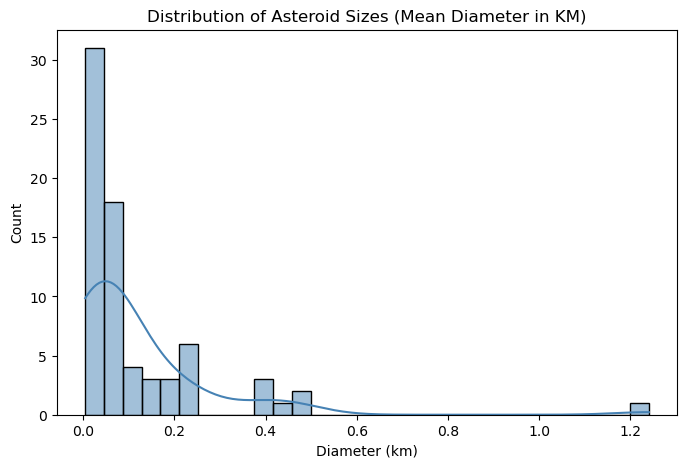

In [3]:
plt.figure(figsize=(8, 5))
sns.histplot(df['mean_diameter_km'], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Asteroid Sizes (Mean Diameter in KM)")
plt.xlabel("Diameter (km)")
plt.ylabel("Count")
plt.show()


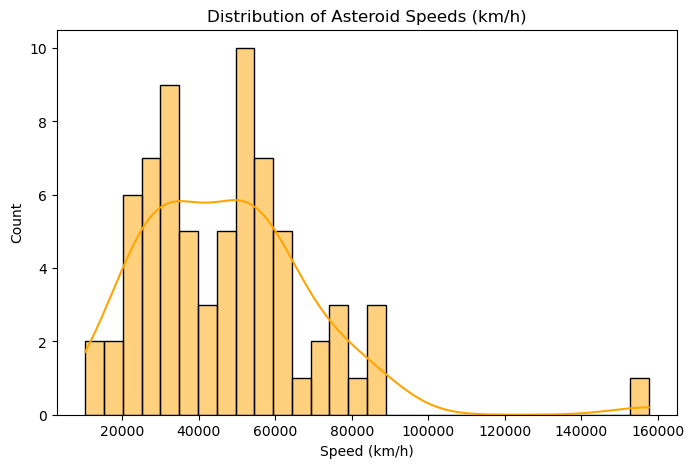

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['speed_km_h'], bins=30, kde=True, color='orange')
plt.title("Distribution of Asteroid Speeds (km/h)")
plt.xlabel("Speed (km/h)")
plt.ylabel("Count")
plt.show()


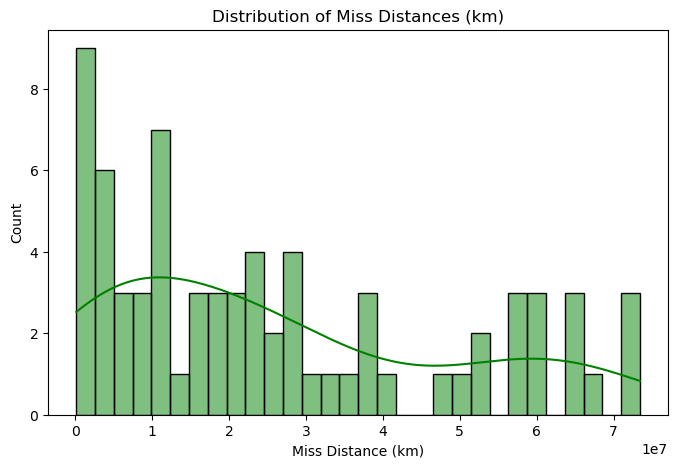

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['miss_distance_km'], bins=30, kde=True, color='green')
plt.title("Distribution of Miss Distances (km)")
plt.xlabel("Miss Distance (km)")
plt.ylabel("Count")
plt.show()


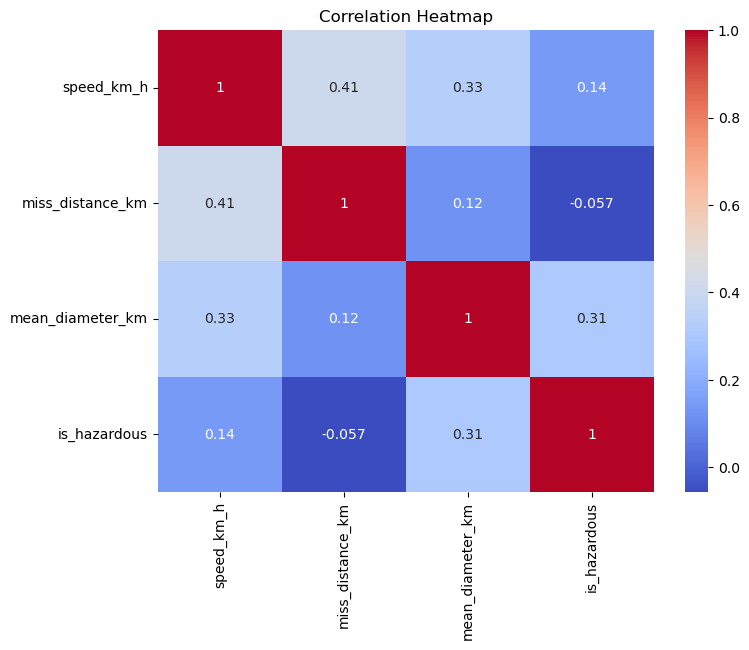

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['speed_km_h', 'miss_distance_km', 'mean_diameter_km', 'is_hazardous']].corr(), 
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


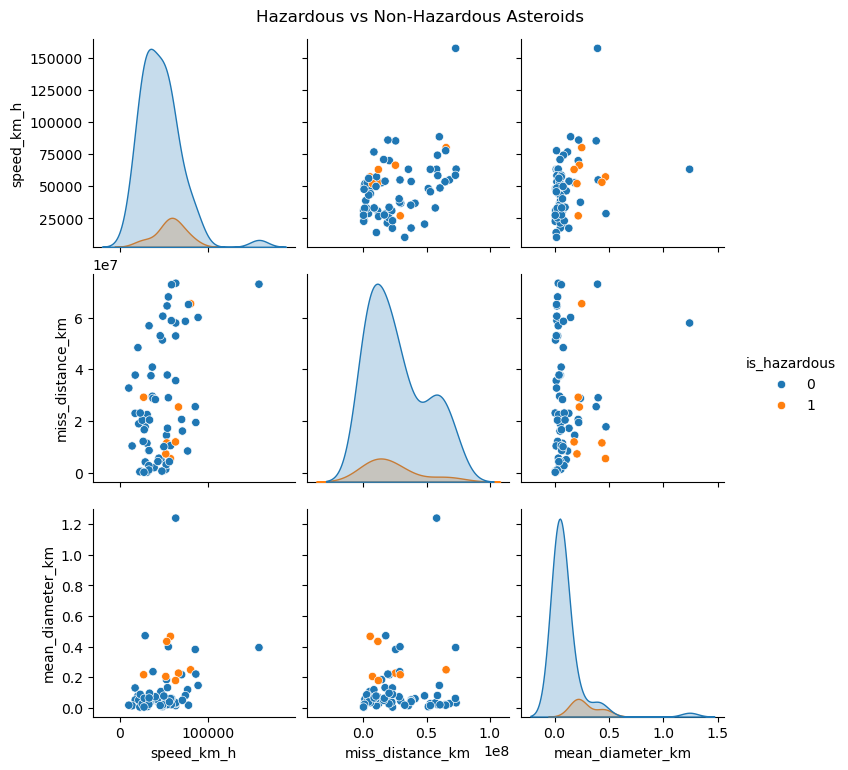

In [7]:
sns.pairplot(df, hue='is_hazardous', vars=['speed_km_h', 'miss_distance_km', 'mean_diameter_km'])
plt.suptitle("Hazardous vs Non-Hazardous Asteroids", y=1.02)
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features & label
X = df[['speed_km_h', 'miss_distance_km', 'mean_diameter_km']]
y = df['is_hazardous']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict
y_pred_lr = logreg.predict(X_test)

# Evaluate
print("🔍 Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


🔍 Logistic Regression:
Accuracy: 0.8666666666666667
Confusion Matrix:
 [[13  0]
 [ 2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.00      0.00      0.00         2

    accuracy                           0.87        15
   macro avg       0.43      0.50      0.46        15
weighted avg       0.75      0.87      0.80        15



c:\Users\ojass\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ojass\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ojass\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("🌳 Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


🌳 Random Forest:
Accuracy: 0.8666666666666667
Confusion Matrix:
 [[13  0]
 [ 2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.00      0.00      0.00         2

    accuracy                           0.87        15
   macro avg       0.43      0.50      0.46        15
weighted avg       0.75      0.87      0.80        15



c:\Users\ojass\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ojass\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ojass\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
import numpy as np

feature_names = ['speed_km_h', 'miss_distance_km', 'mean_diameter_km']
importances = rf.feature_importances_

for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.3f}")


speed_km_h: 0.297
miss_distance_km: 0.308
mean_diameter_km: 0.395


In [12]:
from datetime import datetime, timedelta

# Dates
end_date = datetime.today().date()
start_date = (end_date - timedelta(days=7)).strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

# API call
url = f"https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&end_date={end_date_str}&api_key={API_KEY}"
res = requests.get(url)
data = res.json()


In [13]:
neo_list = []

for date in data['near_earth_objects']:
    for obj in data['near_earth_objects'][date]:
        name = obj['name']
        speed = float(obj['close_approach_data'][0]['relative_velocity']['kilometers_per_hour'])
        distance = float(obj['close_approach_data'][0]['miss_distance']['kilometers'])
        diameter_min = obj['estimated_diameter']['kilometers']['estimated_diameter_min']
        diameter_max = obj['estimated_diameter']['kilometers']['estimated_diameter_max']
        hazardous = obj['is_potentially_hazardous_asteroid']
        
        neo_list.append({
            'name': name,
            'speed_km_h': speed,
            'miss_distance_km': distance,
            'diameter_min_km': diameter_min,
            'diameter_max_km': diameter_max,
            'is_hazardous': hazardous
        })

weekly_df = pd.DataFrame(neo_list)
weekly_df['mean_diameter_km'] = (weekly_df['diameter_min_km'] + weekly_df['diameter_max_km']) / 2


In [14]:
total_asteroids = len(weekly_df)
hazardous_count = weekly_df['is_hazardous'].sum()
close_calls = weekly_df[weekly_df['miss_distance_km'] < 750000].shape[0]  # ~0.75 million km

avg_speed = weekly_df['speed_km_h'].mean()
avg_size = weekly_df['mean_diameter_km'].mean()
avg_distance = weekly_df['miss_distance_km'].mean()

print("🚨 WEEKLY ASTEROID REPORT 🚨")
print(f"📅 Date Range: {start_date} to {end_date_str}")
print(f"☄️ Total Asteroids Observed: {total_asteroids}")
print(f"⚠️ Potentially Hazardous: {hazardous_count}")
print(f"📍 Close Calls (<750,000 km): {close_calls}")
print(f"🚀 Avg Speed: {avg_speed:.2f} km/h")
print(f"🪨 Avg Size: {avg_size:.3f} km")
print(f"🌍 Avg Distance from Earth: {avg_distance/1e6:.2f} million km")


🚨 WEEKLY ASTEROID REPORT 🚨
📅 Date Range: 2025-06-17 to 2025-06-24
☄️ Total Asteroids Observed: 72
⚠️ Potentially Hazardous: 7
📍 Close Calls (<750,000 km): 5
🚀 Avg Speed: 47277.05 km/h
🪨 Avg Size: 0.117 km
🌍 Avg Distance from Earth: 26.19 million km


In [15]:
weekly_df.to_csv("weekly_asteroid_report.csv", index=False)


In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [18]:
from joblib import dump
dump(model, "random_forest_model.joblib")


['random_forest_model.joblib']